# Consommation et prix de l'électricité en France 

On travaille sur une base de données "Bilan Électrique au pas demi-heure" mise à disposition par **Enedis** sur le site data.gouv.fr. 
**Enedis** est le gestionnaire de réseaux de distribution de l'électricité en France. 

De plus, on a également souhaité récupérer les données de prix de l'électricité pour pouvoir mettre en évidence la relation entre la consommation et les prix. 
Pour cela, on a récupéré sur le site **Nord Pool** qui est la plus grande bourse du marché de l'énergie en Europe, les données de prix au pas horaire. 

In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_theme(style="darkgrid")

In [4]:
df_conso = pd.read_csv("C:\\Users\\seren\\OneDrive\\Bureau\\M2S1\\ALGO&PYTHON\\bilan-electrique-demi-heure.csv", sep = ";")
df_conso.head()

,Horodate,Mois,Injection RTE (W),Refoulement RTE (W),Pertes modélisées (W),Consommations totale (W),Consommation totale télérelevée (W),Consommation totale profilée (W),Consommation HTA profilée (W),Consommation PME-PMI profilée (W),...,Production décentralisée profilée (W),Production photovoltaïque profilée (W),Production autre profilée (W),Température réalisée lissée (°C),Température normale lissée (°C),Production éolienne totale (W),Production photovoltaïque totale (W),Pseudo rayonnement,Consommation HTA totale (W),Soutirage net vers autres GRD (W)
0,2020-10-20T09:30:00+02:00,10,4.289583e+10,4.076520e+09,2.998834e+09,4.493303e+10,1.464271e+10,3.029032e+10,1.865798e+09,7.575023e+09,...,239647744.0,224980221.0,3660903.0,11.2,12.2,7.695118e+09,5.149727e+08,11.0,1.650851e+10,330019373.0
1,2020-10-20T12:00:00+02:00,10,4.333602e+10,4.265215e+09,3.125184e+09,4.627304e+10,1.419591e+10,3.207713e+10,1.706854e+09,6.773464e+09,...,730574337.0,716023537.0,3660903.0,12.4,13.1,7.687336e+09,1.716482e+09,7.0,1.590277e+10,317024982.0
2,2020-10-20T17:30:00+02:00,10,3.805279e+10,4.231954e+09,2.631003e+09,4.010122e+10,1.286971e+10,2.723151e+10,1.561773e+09,5.973193e+09,...,157270318.0,142345156.0,3660903.0,13.5,14.2,7.652356e+09,3.085066e+08,3.0,1.443149e+10,275383290.0
3,2020-10-21T01:00:00+02:00,10,3.303353e+10,3.963927e+09,2.239883e+09,3.465815e+10,1.022670e+10,2.443145e+10,1.140185e+09,3.539265e+09,...,13418778.0,55140.0,3568844.0,12.8,12.4,6.942612e+09,8.307730e+05,4.0,1.136689e+10,256012359.0
4,2020-10-21T01:30:00+02:00,10,3.252284e+10,4.173912e+09,2.222280e+09,3.418453e+10,1.019306e+10,2.399147e+10,1.131348e+09,3.483127e+09,...,13391071.0,91577.0,3568844.0,12.8,12.4,7.144654e+09,8.689600e+05,4.0,1.132441e+10,239817132.0


In [5]:
df_conso.shape

(87648, 24)

La base de données comportant les données de consommation possède donc `87 648` observations pour `24` variables.
Les données sont donc au pas demi-horaire et s'étendent du 23/10/2016 00h00 au 22/10/2021 22h00. 

**Valeurs manquantes et types de variables**

In [6]:
Nom_Var = df_conso.columns
def var(nomvar,data):
    print("Nom de la var : " + nomvar)
    print(f"Nombre de modalités : {data[nomvar].nunique()}")
    print(f"Vecteurs des modalités : {data[nomvar].unique()}")
    print(f"Counts en chaque modalités : {data[nomvar].value_counts()}")
    print(data[nomvar].describe())
    print(f"La colonne a {data[nomvar].isna().sum()}  valeur(s) manquante(s)")
    print(f"La variable admet donc {(data[nomvar].isna().sum()/len(data))*100} % de valeur(s) manquante(s)")
    
def num_missing(x):
    return sum(x.isnull())

In [7]:
for i in Nom_Var : 
    print(var(i,df_conso))

Nom de la var : Horodate
Nombre de modalités : 87648
Vecteurs des modalités : ['2020-10-20T09:30:00+02:00' '2020-10-20T12:00:00+02:00'
 '2020-10-20T17:30:00+02:00' ... '2019-02-02T23:00:00+01:00'
 '2019-02-03T01:30:00+01:00' '2019-02-03T04:30:00+01:00']
Counts en chaque modalités : 2017-05-31T17:30:00+02:00    1
2017-01-19T22:30:00+01:00    1
2017-10-05T15:30:00+02:00    1
2018-09-10T04:30:00+02:00    1
2016-11-27T19:00:00+01:00    1
                            ..
2020-07-03T17:30:00+02:00    1
2018-07-09T13:00:00+02:00    1
2021-04-14T16:30:00+02:00    1
2017-06-20T06:30:00+02:00    1
2018-01-14T19:00:00+01:00    1
Name: Horodate, Length: 87648, dtype: int64
count                         87648
unique                        87648
top       2017-05-31T17:30:00+02:00
freq                              1
Name: Horodate, dtype: object
La colonne a 0  valeur(s) manquante(s)
La variable admet donc 0.0 % de valeur(s) manquante(s)
None
Nom de la var : Mois
Nombre de modalités : 12
Vecteurs des 

Name: Production photovoltaïque profilée (W), Length: 61362, dtype: int64
count    8.764800e+04
mean     4.938253e+08
std      7.219289e+08
min      0.000000e+00
25%      0.000000e+00
50%      2.770679e+07
75%      8.591013e+08
max      4.121240e+09
Name: Production photovoltaïque profilée (W), dtype: float64
La colonne a 0  valeur(s) manquante(s)
La variable admet donc 0.0 % de valeur(s) manquante(s)
None
Nom de la var : Production autre profilée (W)
Nombre de modalités : 1198
Vecteurs des modalités : [3660903. 3568844. 3571256. ...  551324. 1088072.  519510.]
Counts en chaque modalités : 221553.0     480
124940.0     432
118421.0     384
165207.0     384
100633.0     336
            ... 
1989940.0     48
1203496.0     48
994853.0      48
524298.0      48
3754595.0     46
Name: Production autre profilée (W), Length: 1198, dtype: int64
count    8.764800e+04
mean     1.332284e+06
std      1.400463e+06
min      7.163100e+04
25%      2.215530e+05
50%      8.430960e+05
75%      2.118641e+0

Name: Soutirage net vers autres GRD (W), dtype: float64
La colonne a 0  valeur(s) manquante(s)
La variable admet donc 0.0 % de valeur(s) manquante(s)
None


In [8]:
print("Valeurs manquantes par colonne:")
print(df_conso.apply(num_missing, axis=0)) 

Valeurs manquantes par colonne:
Horodate                                                          0
Mois                                                              0
Injection RTE (W)                                                 0
Refoulement RTE (W)                                               0
Pertes modélisées (W)                                             0
Consommations totale (W)                                          0
Consommation totale télérelevée (W)                               0
Consommation totale profilée (W)                                  0
Consommation HTA profilée (W)                                     0
Consommation PME-PMI profilée (W)                                 0
Consommation professionnelle profilée (W)                         0
Consommation résidentielle profilée (W)                           0
Production décentralisée totale (W)                               0
Production décentralisée télérelevée à courbe de charge (W)       0
Production décen

On voit donc que seule la variables "Pseudo rayonnement" admet des valeurs manquantes pour un total de 8%. 
En raison du nombre de valeurs manquantes et du fait que seule cette variable en admette, on décide de la supprimer. 

On observe également que toutes nos variables sont numériques. C'est également le cas de la variable de date, on décide donc de la mettre au format date 

In [38]:
df_conso.drop(columns = ["Pseudo rayonnement"], inplace = True)
df_conso["Horodate"] = pd.to_datetime(df_conso["Horodate"])
df_conso = df_conso.sort_values(by=['Horodate'])

KeyError: "['Pseudo rayonnement'] not found in axis"

**Quelques graphiques**

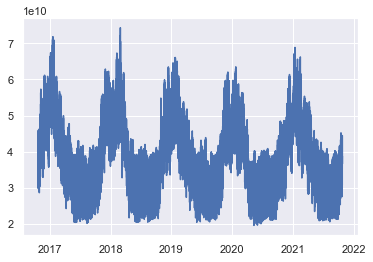

In [32]:
# Evolution de la consommation en fonction du temps
plt.plot(df_conso["Horodate"], df_conso["Consommations totale (W)"]) ; 

# ordonner les dates 

On voit une saisonnalité se dégager du graphique. Cela est conforme à l'intuition qu'on consomme plus d'énergie quand les températures sont basses et inversément : la consommation atteint donc son pic en hiver.
On essaye de zoomer le graphique sur une année pour mettre en évidence de manière plus lisible cette saisonnalité.

In [33]:
# On créé une nouvelle variable Year 
df_conso.insert(1, 'Year',df_conso["Horodate"].astype(str).str[:4] )
# On créé une nouvelle variable Hours 
df_conso.insert(2, 'Hours',df_conso["Horodate"].astype(str).str[11:13] )


ValueError: cannot insert Year, already exists

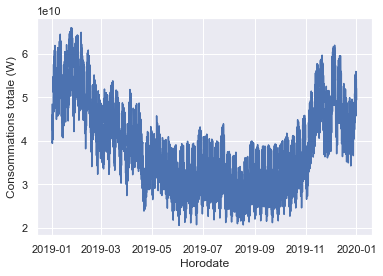

In [34]:
df_2019 = df_conso[df_conso["Year"] == "2019"]
sns.lineplot(x = "Horodate", y = "Consommations totale (W)",
             data = df_2019)

On a choisit de répresenter le graphique sur l'année `2021`. 
Conformément à notre intuition, on voit que la consommation est plus elevée en hiver : elle est maximale au moins de janvier, puis baisse jusqu'a augmenté vers le mois de septembre.
On remarque également des oscillations au sein même des mois. On décide alors d'affiner encore plus notre graphique pour mettre en évidence les variations de consommation au sein d'une même journée. 

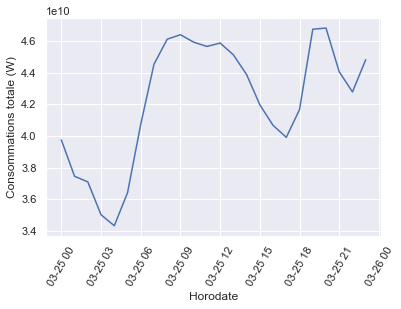

In [35]:
df_day = df_conso[df_conso["Horodate"].astype(str).str.startswith("2019-03-25")]
sns.lineplot(x = "Horodate", y = "Consommations totale (W)",
             data = df_day
             )
plt.xticks(rotation = 60);

On voit qu'un pic de consommation a lieu en milieu de journée, puis un second en début de soirée. 
Cela est conforme également à ce qu'on peut attendre : la nuit la consommation est presque nulle, puis elle augmente le matin et en fin de journée. 
De plus, la base regroupe les consommations de professionnelles et également de particuliers : les premiers consomment donc la journée pour leur activité, et les dernier consomment plutôt en fin de journée/début de soirée. 
On peut aisément vérifier cela séparant les deux consommations. 

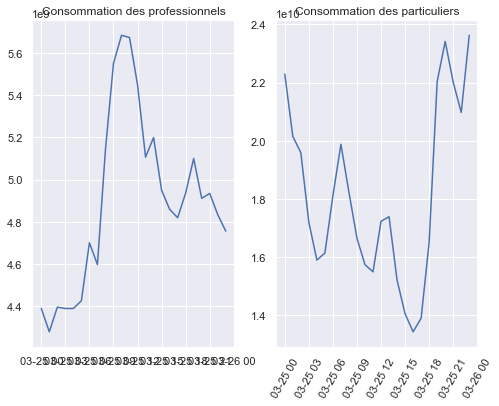

In [36]:
fig, [ax1, ax2]= plt.subplots(1, 2, figsize=(8, 6))

ax1.set_title("Consommation des professionnels")
ax1.plot(df_day["Horodate"], df_day["Consommation professionnelle profilée (W)"])
plt.xticks(rotation = 60)

ax2.set_title("Consommation des particuliers")
ax2.plot(df_day["Horodate"], df_day["Consommation résidentielle profilée (W)"]) 
plt.xticks(rotation = 60);
 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


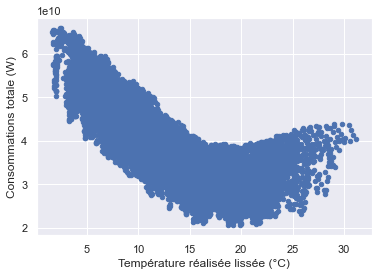

In [37]:
df_2019.plot(kind='scatter',
       x="Température réalisée lissée (°C)",
       y="Consommations totale (W)"); 

Notre intuition avant la construction du graphique était qu'il existe surement une corrélation négative entre la consommation d'énergie et la température avant un certain seuil : plus la température est basse et plus la consommation d'équipements électriques augmente, puis la consommation électrique diminue quand les températures remontent, jusqu'à une certaine température qui entraine une consommation accrue d'autres équipements (`Exemple` : les climatisations). 
Cette intuition est vérifiée par le graphique, et la température seuil semble être au alentur de 25 degrés. 

## Base de données avec les prix 

La base de données qu'on a travaillé jusque là était complète, mais il manquait une variable importante pour notre analyse : **le prix de l'électricité**. 
On a donc récupérer une autre base avec les prix au pas horaire. 
Sur le site de la bourse du marché de l'énergie, on a pu récupérer un fichier excel par année. 
On a donc du les importer les et concaténer. 

In [16]:
# Importation et concaténation des prix 

dossiers = { 'data' : [2016,2022]}
	     
dfs = []
k = 'data'
for i in range(dossiers[k][0],dossiers[k][1]):
    try:
        dfs.append(pd.read_excel(r'C:\\Users\\seren\\OneDrive\\Bureau\\M2S1\\ALGO&PYTHON\\{}\\{}.xlsx'.format(k,i)))
    except:
        pass
ganisland = pd.concat(dfs)
df_price = ganisland.reset_index()

df_price.drop(columns = ["index"], inplace = True)

In [17]:
df_price.head()

,Date,Hours,Prix
0,2016-01-01,00:00:00,16.39
1,2016-01-01,01:00:00,16.04
2,2016-01-01,02:00:00,15.74
3,2016-01-01,03:00:00,15.57
4,2016-01-01,04:00:00,15.47


In [18]:
df_price.shape

(51366, 3)

Le dataframe contient donc `51 366` observations et `3` variables. 
Cependant, on ne peut pas concaténer directement ce dataframe avec celui des consommations car d'une part celui-ci est au pas horaire et non demi-horaire, et d'autre part la période de temps n'est pas la même. 
On décide donc de travailler au pas horaire. 

In [19]:
# On garde seulement les heures entières 
minutes = df_conso[df_conso['Horodate'].astype(str).str.contains(':30:')].index
df_conso.drop(minutes,0, inplace=True)

# On récupère la période qui nous intéresse 
df_price = df_price[(df_price["Date"] >= "2016-10-23") & (df_price["Date"] <= "2021-10-22" )]

In [20]:
df_conso.shape

(43824, 25)

In [21]:
df_price.shape

(43829, 3)

In [22]:
Nom_Var = df_price.columns
for i in Nom_Var : 
    print(var(i,df_price))

Nom de la var : Date
Nombre de modalités : 1826
Vecteurs des modalités : ['2016-10-23T00:00:00.000000000' '2016-10-24T00:00:00.000000000'
 '2016-10-25T00:00:00.000000000' ... '2021-10-20T00:00:00.000000000'
 '2021-10-21T00:00:00.000000000' '2021-10-22T00:00:00.000000000']
Counts en chaque modalités : 2017-10-29    25
2020-10-25    25
2019-10-27    25
2016-10-30    25
2018-10-28    25
              ..
2020-12-30    24
2016-12-25    24
2020-05-29    24
2018-09-18    24
2016-10-23    24
Name: Date, Length: 1826, dtype: int64
count                   43829
unique                   1826
top       2017-10-29 00:00:00
freq                       25
first     2016-10-23 00:00:00
last      2021-10-22 00:00:00
Name: Date, dtype: object
La colonne a 0  valeur(s) manquante(s)
La variable admet donc 0.0 % de valeur(s) manquante(s)
None
Nom de la var : Hours
Nombre de modalités : 8761
Vecteurs des modalités : [datetime.datetime(1900, 10, 22, 0, 0)
 datetime.datetime(1900, 10, 22, 1, 0)
 datetime.datet

In [23]:
#Pour trouver les lignes qu'il y a en trop.
#On regarde quelle heure apparait plus que les autre
#On trouve qu'il y a 1831 minuit alors que pour les autres valeurs il n'y en a que 1826
df_price[df_price['Hours'].astype(str).str.contains('00:00:00')].count
df_conso[df_conso['Horodate'].astype(str).str.contains('T00:00:00')].count

<bound method DataFrame.count of Empty DataFrame
Columns: [Horodate, Year, Hours, Mois, Injection RTE (W), Refoulement RTE (W), Pertes modélisées (W), Consommations totale (W), Consommation totale télérelevée (W), Consommation totale profilée (W), Consommation HTA profilée (W), Consommation PME-PMI profilée (W), Consommation professionnelle profilée (W), Consommation résidentielle profilée (W), Production décentralisée totale (W), Production décentralisée télérelevée à courbe de charge (W), Production décentralisée profilée (W), Production photovoltaïque profilée (W), Production autre profilée (W), Température réalisée lissée (°C), Température normale lissée (°C), Production éolienne totale (W), Production photovoltaïque totale (W), Consommation HTA totale (W), Soutirage net vers autres GRD (W)]
Index: []

[0 rows x 25 columns]>

On se rend compte que même au même pas de temps, et avec la même période, il y a 5 observations en trop dans le dataframe des prix. 
En faisant des analyses sur les valeurs manquantes, on se rend compte que la variable Prix admet exactement 5 valeurs manquantes. En cherchant plus loin on voit que cela correspondait à des occurences de l'heure 00h. On décide donc de supprimer ces lignes pour ensuite pouvoir concaténer les deux dataframes. 

In [24]:

#Pour supprimer les lignes en trop avec un nan dans la colonne prix
index_with_nan = df_price.index[df_price["Prix"].isnull()]
df_price.drop(index_with_nan,0, inplace=True)

#Suppression colonnes dans df5 pour qu'il ne reste que les prix
df_price = df_price.drop(['Hours', 'Date'], 1) 


#Remettre l'index à 0
df_conso = df_conso.reset_index(drop=False, inplace=False)
df_price = df_price.reset_index(drop=False, inplace=False)


#On concatène les deux fichiers
df_final = df_conso.merge(df_price, how='inner', left_index=True, right_index=True)



In [25]:
df_final.head()
df_final.drop(columns = ["index_x","index_y"], inplace = True)

,index_x,Horodate,Year,Hours,Mois,Injection RTE (W),Refoulement RTE (W),Pertes modélisées (W),Consommations totale (W),Consommation totale télérelevée (W),...,Production photovoltaïque profilée (W),Production autre profilée (W),Température réalisée lissée (°C),Température normale lissée (°C),Production éolienne totale (W),Production photovoltaïque totale (W),Consommation HTA totale (W),Soutirage net vers autres GRD (W),index_y,Prix
0,53530,2016-10-23 00:00:00+02:00,2016,00,10,4.063966e+10,8.054930e+08,3.339653e+09,3.890665e+10,8.034015e+09,...,0.0,72142.0,9.8,12.2,2.101485e+09,25333.0,8.941033e+09,440226697.0,7104,33.09
1,29018,2016-10-23 01:00:00+02:00,2016,01,10,3.717426e+10,8.599010e+08,2.990955e+09,3.573062e+10,7.934251e+09,...,0.0,72142.0,9.8,12.2,2.067500e+09,22000.0,8.803581e+09,403091526.0,7105,32.69
2,53531,2016-10-23 02:00:00+02:00,2016,02,10,3.593819e+10,8.620720e+08,2.869121e+09,3.465796e+10,7.864872e+09,...,0.0,72142.0,9.7,12.1,2.098960e+09,22000.0,8.687375e+09,388068636.0,7106,32.41
3,38732,2016-10-23 03:00:00+02:00,2016,03,10,3.292863e+10,9.200830e+08,2.578077e+09,3.195787e+10,7.853917e+09,...,0.0,72142.0,9.7,12.1,2.129551e+09,25000.0,8.672367e+09,348244654.0,7107,31.85
4,77655,2016-10-23 04:00:00+02:00,2016,04,10,3.116248e+10,1.062332e+09,2.410971e+09,3.041073e+10,7.828469e+09,...,0.0,72142.0,9.6,12.0,2.293851e+09,22000.0,8.656774e+09,328433517.0,7108,32.03


**Matrice de corrélation**

''

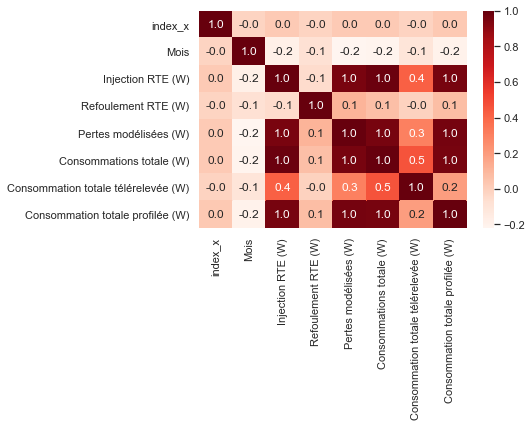

In [26]:
sns.heatmap(df_final.corr().iloc[:8,:8],
           cmap = 'Reds',
           annot = True,  # met les corrélations dans les carrés
           fmt = '.1f')   # 1 chiffre après la virgule. Pour des entiers utiliser le format "d"
;

''

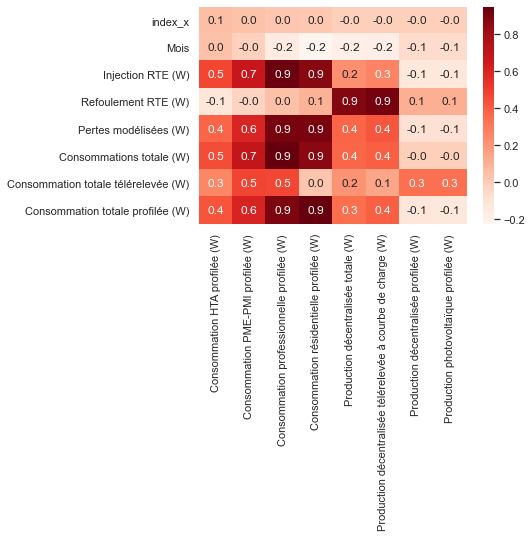

In [27]:
sns.heatmap(df_final.corr().iloc[:8,8:16],
           cmap = 'Reds',
           annot = True,  
           fmt = '.1f')   
;

''

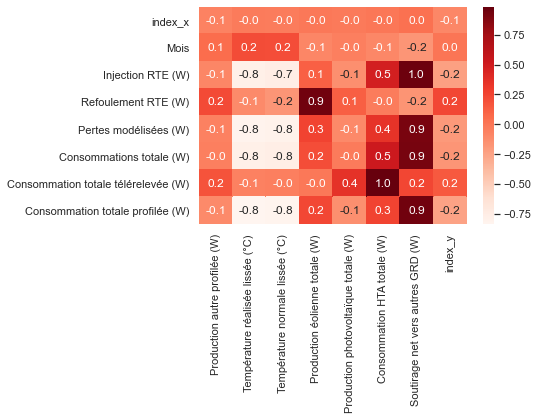

In [28]:
sns.heatmap(df_final.corr().iloc[:8,16:24],
           cmap = 'Reds',
           annot = True,  
           fmt = '.1f')   
;

''

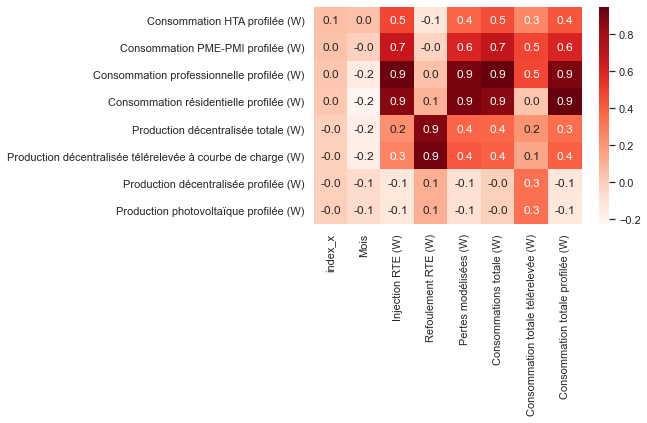

In [29]:
sns.heatmap(df_final.corr().iloc[8:16,:8],
           cmap = 'Reds',
           annot = True,  
           fmt = '.1f')   
;

''

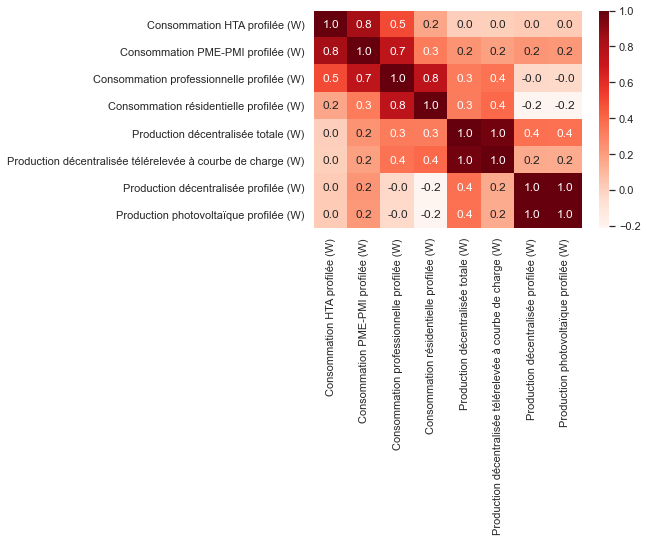

In [30]:
sns.heatmap(df_final.corr().iloc[8:16,8:16],
           cmap = 'Reds',
           annot = True,  
           fmt = '.1f')   
;

''

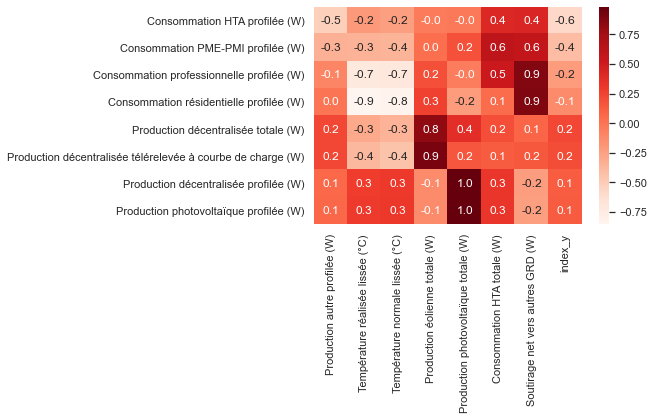

In [31]:
sns.heatmap(df_final.corr().iloc[8:16,16:24],
           cmap = 'Reds',
           annot = True,  
           fmt = '.1f')   
;